In [1]:
import gym

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

def step(action, num_steps=1):
    e =env.unwrapped
    actions_meanings = e.get_action_meanings()
    act_dict = {actions_meanings[i].lower():i for i in range(len(actions_meanings))}
    a = act_dict[action]
    for i in range(num_steps):
        env.step(a)

def all_but(inds, arr, rem):
    new_inds
    new_arr = [a for i,a in enumerate(arr) if i not in rem]

Noop = 0
Fire = 1
Right = 2
Left = 3

In [2]:
def printinds(inds):
    print("[",", ".join(["%3i"%(i) for i in inds]),"]") 
    

##### Pick Game

In [3]:
env = gym.make("FrostbiteNoFrameskip-v4")
env.reset();

##### On Macs this will open a separate window with the game. Try to get this window split-screened with this notebook.

In [4]:
env.render("human")

True

In [5]:
e =env.unwrapped
actions_meanings = e.get_action_meanings()
act_dict = {actions_meanings[i].lower():i for i in range(len(actions_meanings))}


In [6]:
act_dict

{'noop': 0,
 'fire': 1,
 'up': 2,
 'right': 3,
 'left': 4,
 'down': 5,
 'upright': 6,
 'upleft': 7,
 'downright': 8,
 'downleft': 9,
 'upfire': 10,
 'rightfire': 11,
 'leftfire': 12,
 'downfire': 13,
 'uprightfire': 14,
 'upleftfire': 15,
 'downrightfire': 16,
 'downleftfire': 17}

In [166]:
inds_to_ignore = [  1,   2,  25,  26,  31,  32,  33,  34,  85,  87,  96,  97,  98,  99, 126 ]#[31,  32,  33,  34,  96,  97,  98,  99 ,22,  24,  35,  36,  37,  38,  39,  40,  41,  42 , 2,  1,  23,  25,  26,  27, 103, 126 ] #[  30,  39,  41,  51,  55, 118 ] #[6,73,42, 109,70,57,  58, 114, 124, 125,126, 127,83,  84,10,  87,  88,76,  80, 111, 4,  11,  26,  75,  77,  79,  1,   3,   8,   9,  74,  81,  82,  90, 106, 110, 112, 2,  78,  85, 72]#[ 8, 26, 78, 79, 119, 12 ,13] + [54, 55, 57] #, 67, 68, 69, 88]#[  0,  15,  20,  33,  35,  57,  64,  69,  70,  71,  72,  93,  94, 103, 105, 119, 122, 
                  #22, 34, 59, 61, 63, 65, 66, 67, 68, 81, 88, 91, 92, 95, 96, 98]

##### Repeat the Below Cell To Step Through The Game

In [186]:
inds = np.arange(128)
inds = np.delete(inds,inds_to_ignore)
r0 = env.env.ale.getRAM()[inds]
step("down", 40)# change this action
env.render("human")
r1 = env.env.ale.getRAM()[inds]
diff = r1 - r0
printinds(inds[diff!=0]) # prints rams that change
printinds(r0[diff!=0])
printinds(r1[diff!=0])

[  ]
[  ]
[  ]


In [259]:
[   4, 108, 110 ]
[  11,   8,   1 ]
[   7,   0,   0 ]

3

#### Alternative Matplotlib Way of Stepping Through

/Users/evanracah/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


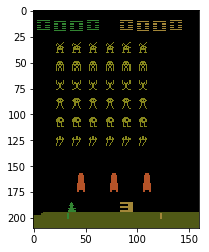

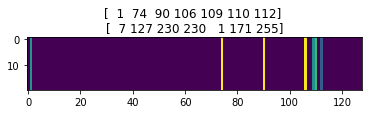

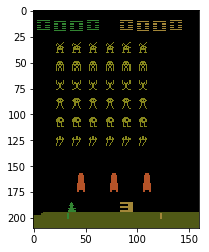

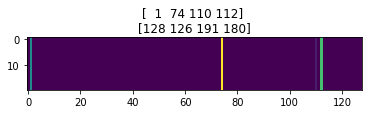

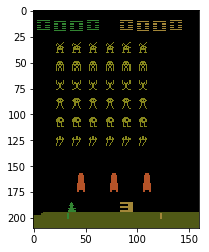

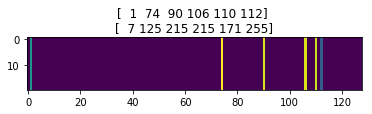

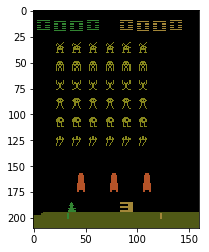

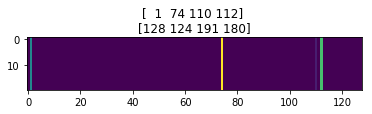

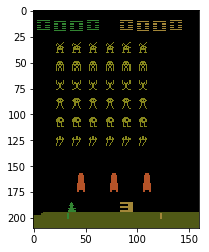

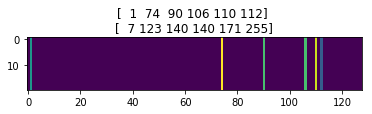

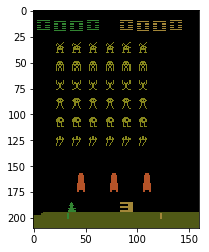

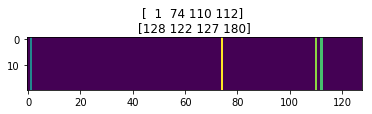

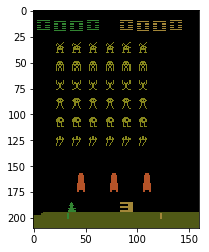

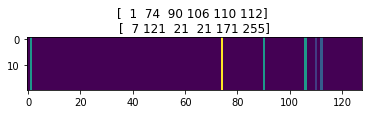

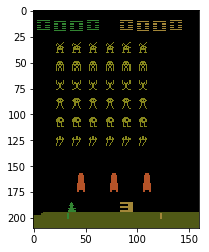

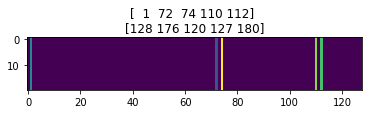

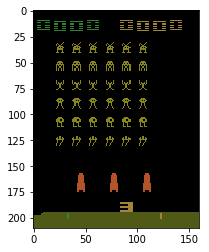

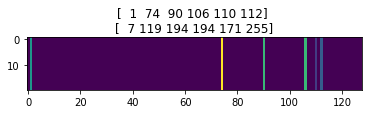

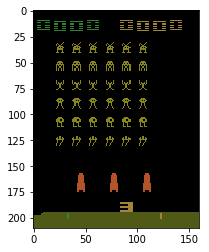

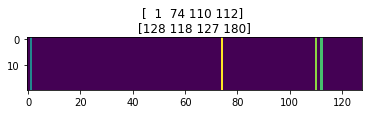

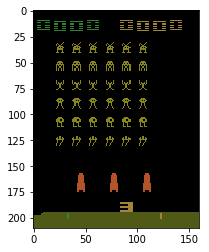

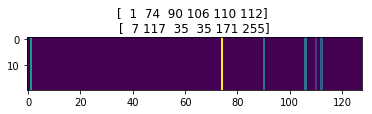

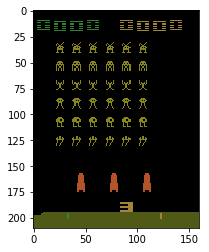

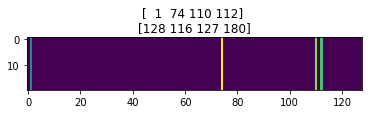

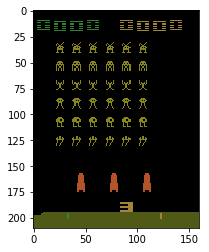

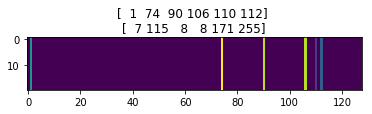

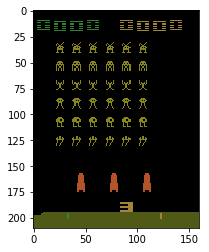

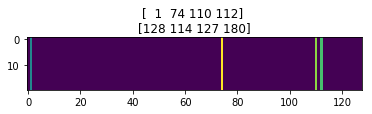

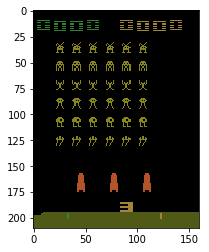

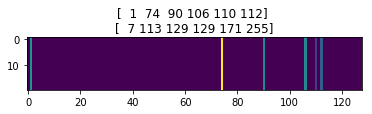

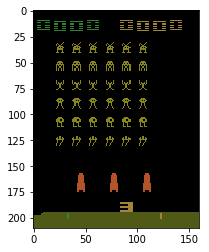

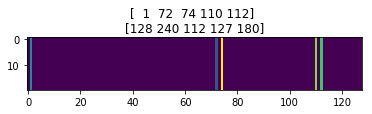

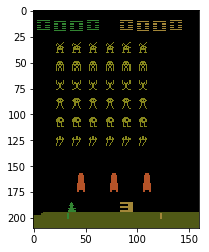

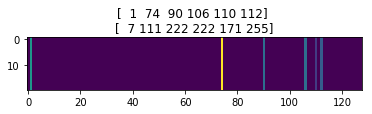

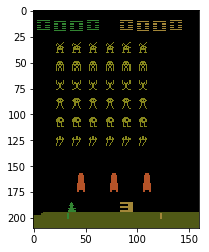

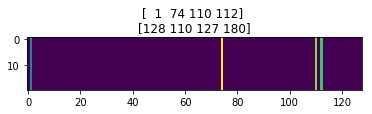

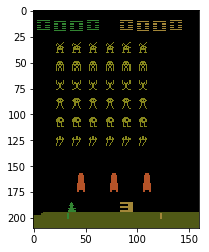

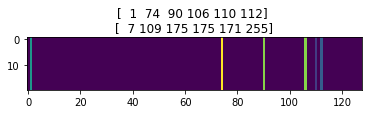

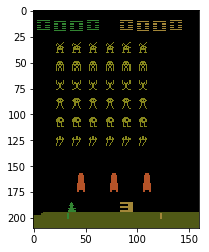

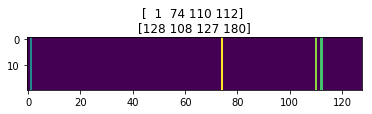

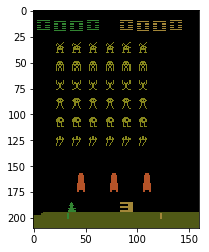

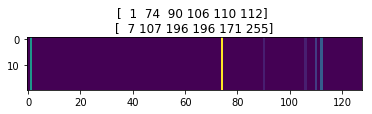

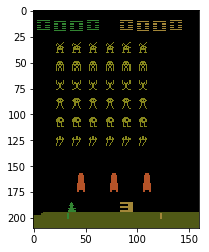

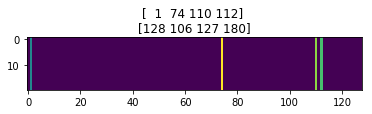

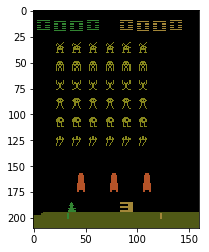

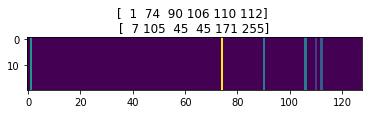

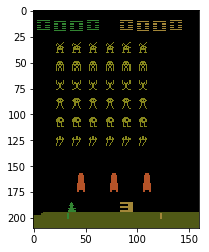

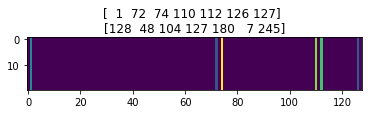

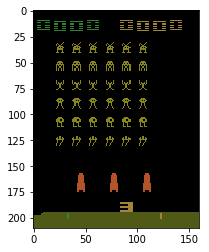

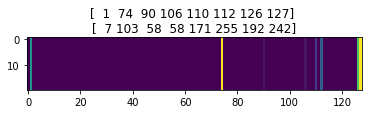

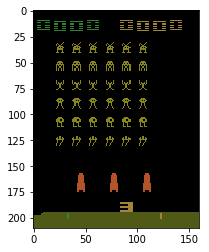

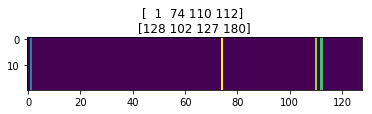

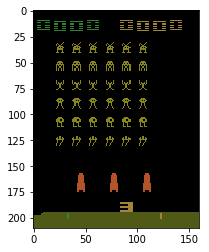

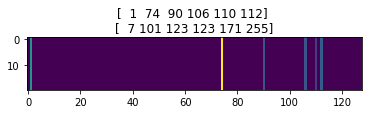

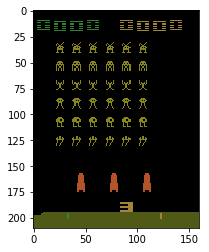

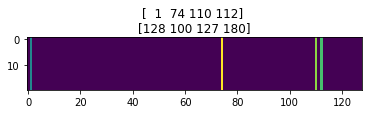

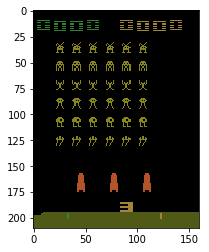

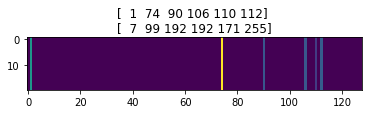

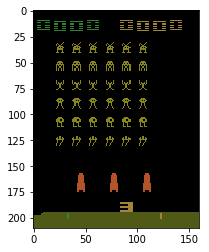

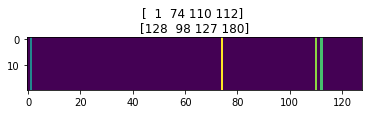

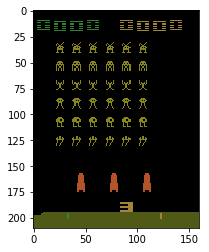

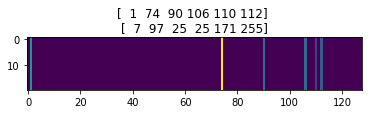

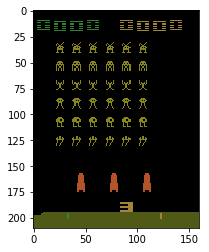

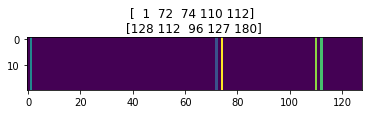

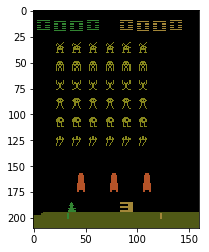

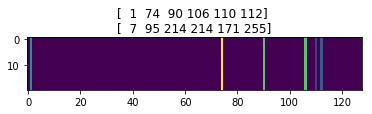

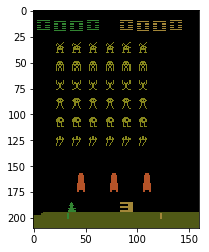

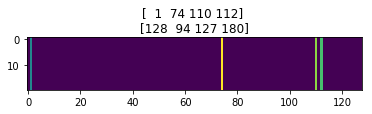

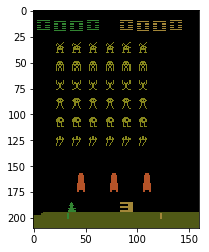

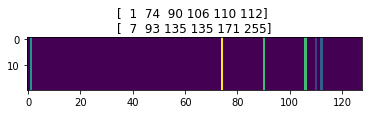

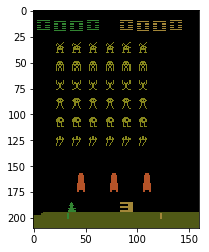

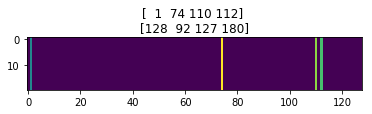

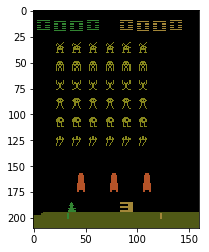

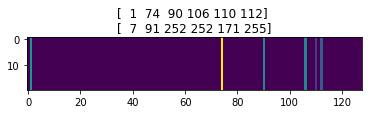

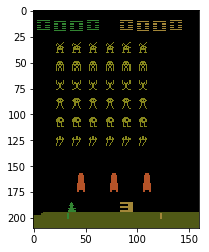

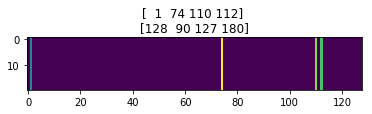

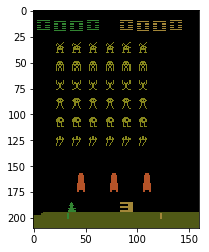

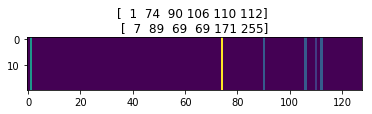

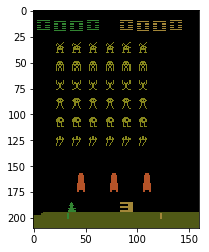

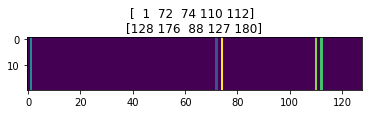

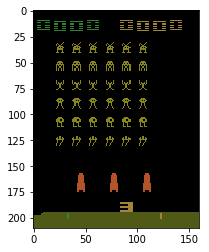

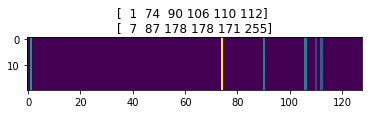

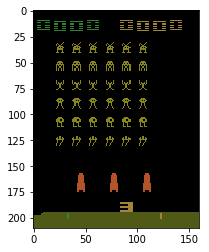

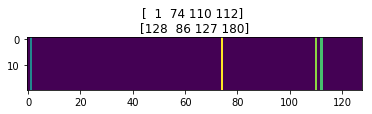

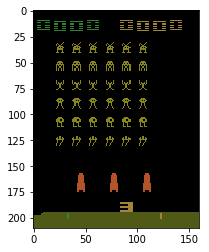

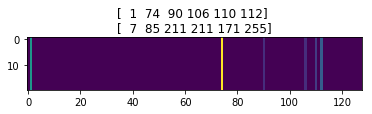

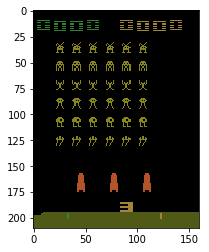

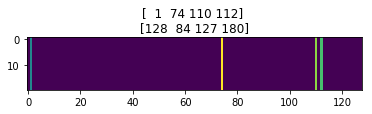

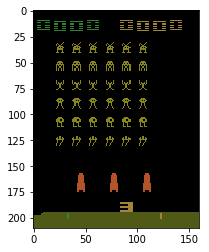

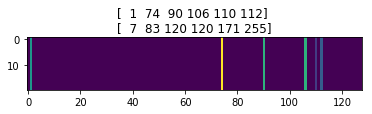

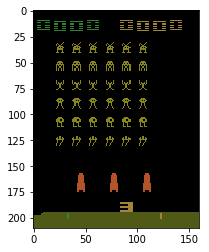

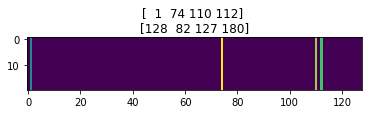

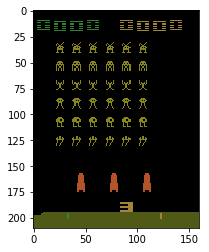

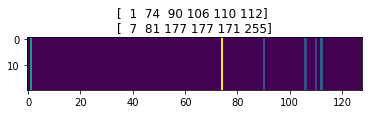

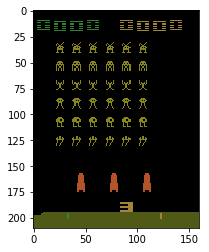

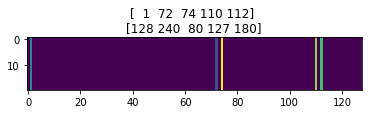

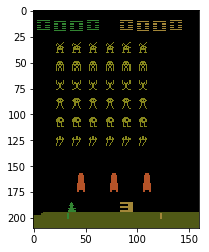

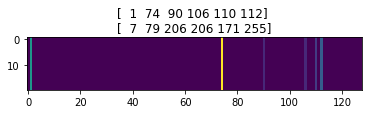

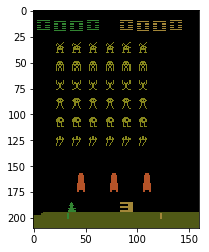

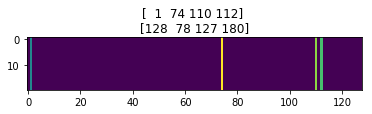

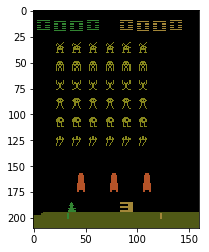

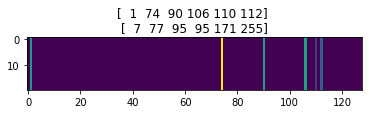

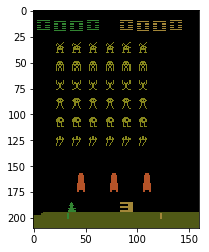

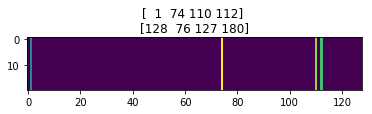

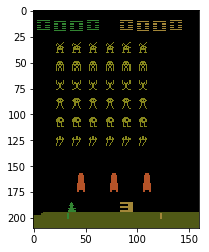

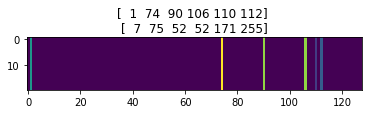

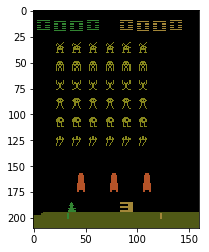

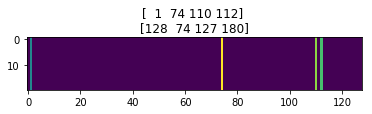

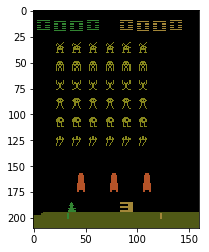

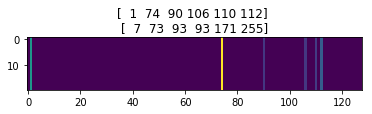

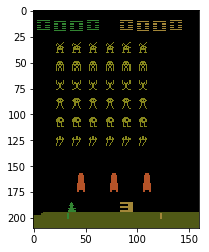

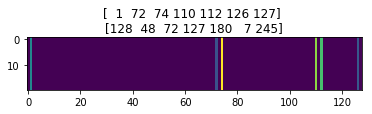

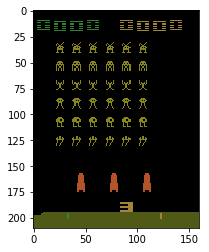

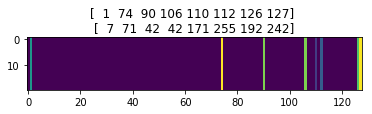

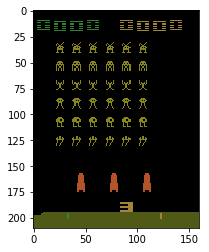

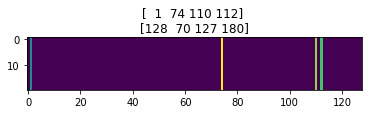

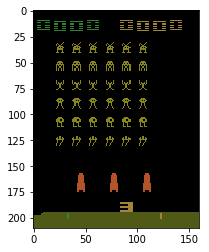

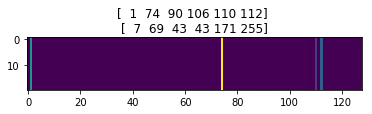

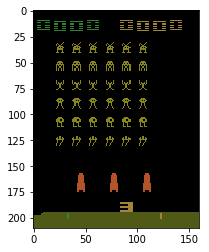

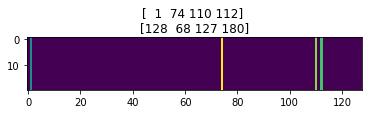

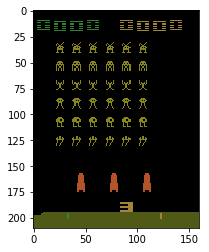

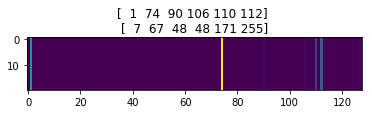

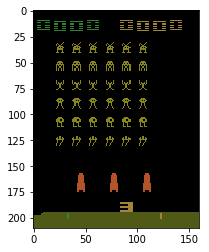

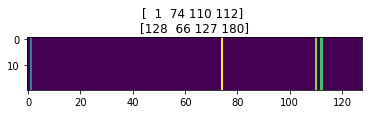

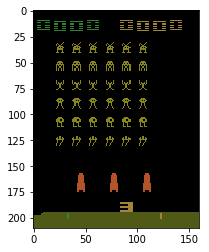

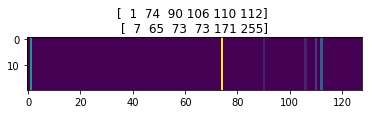

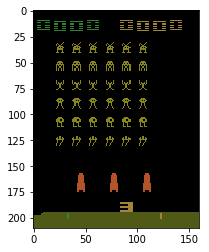

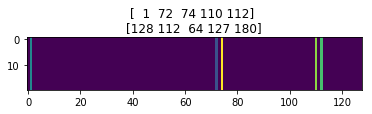

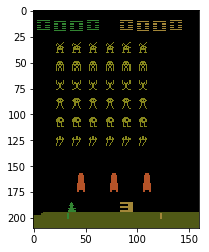

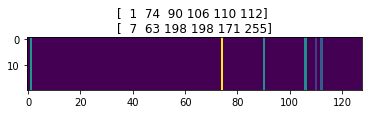

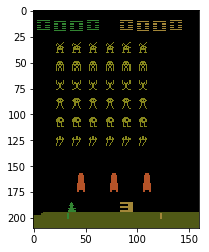

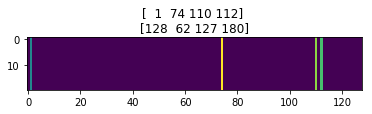

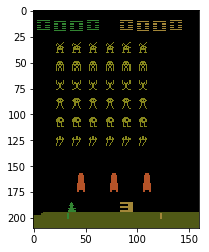

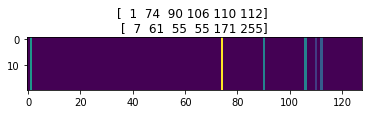

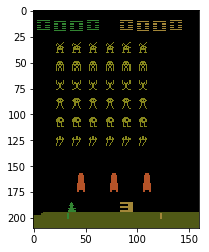

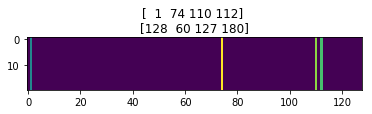

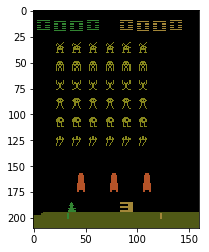

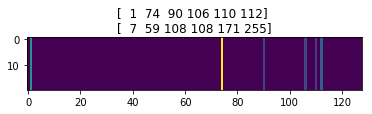

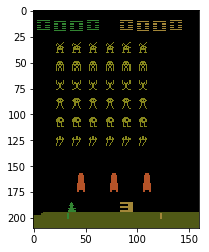

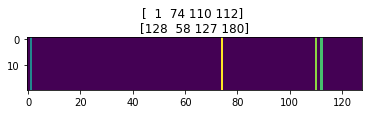

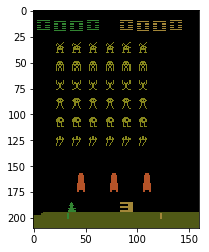

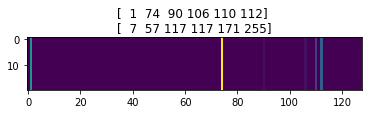

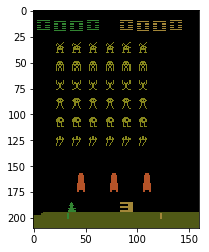

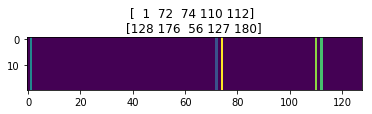

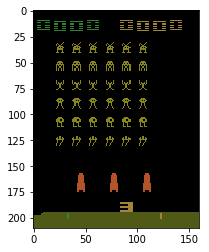

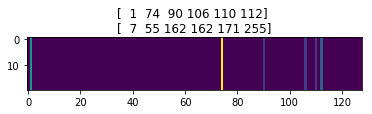

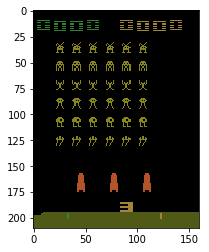

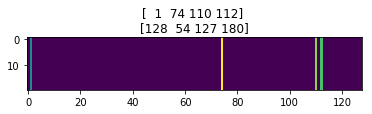

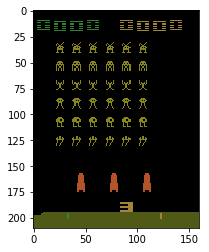

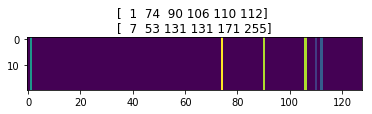

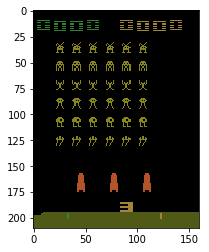

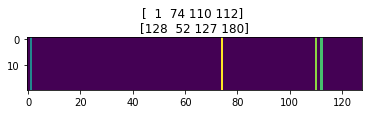

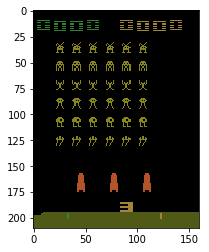

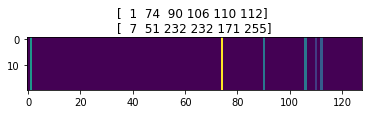

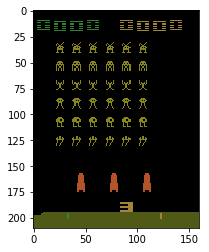

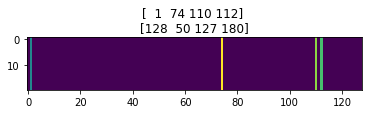

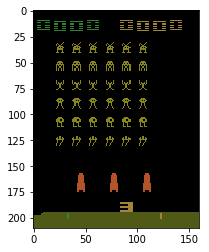

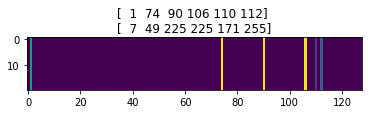

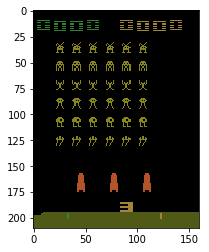

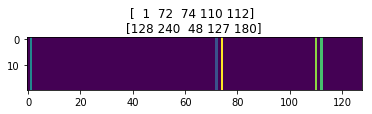

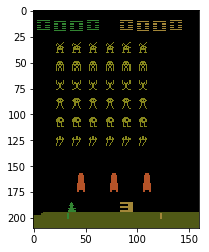

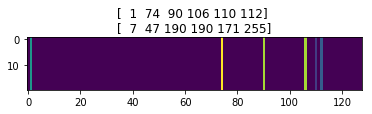

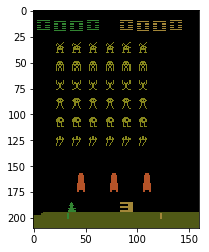

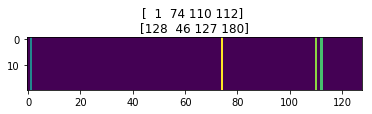

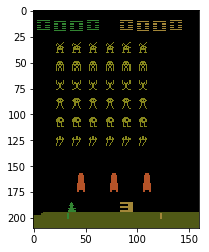

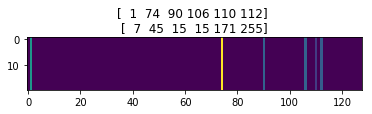

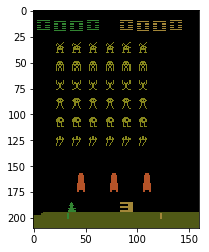

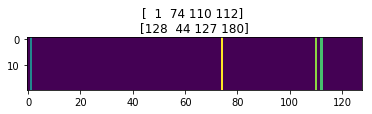

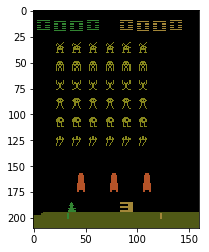

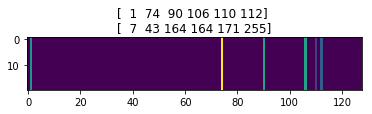

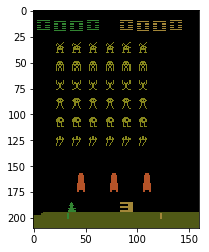

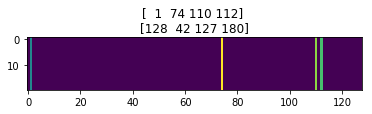

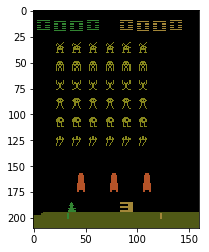

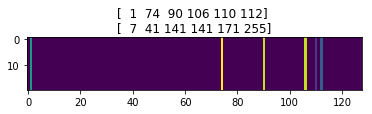

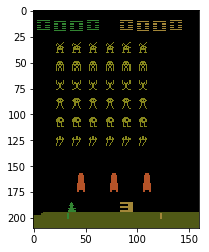

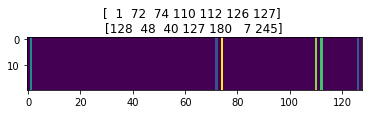

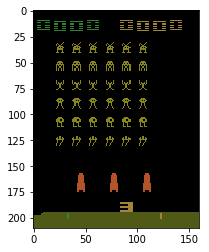

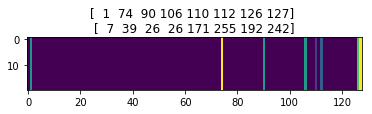

In [ ]:
i = 0
env.step(1)

for j in range(100):
    r0 = env.env.ale.getRAM()
    if j <= 4:
        obs,_,_,_ = env.step(3)
    else:
        obs,_,_,_ = env.step(2)
    r1 = env.env.ale.getRAM()
    diff = r1 - r0

    diff = diff[None,:]
    diff = np.repeat(diff,20,axis=0)


    plt.figure(i)
    plt.imshow(obs)

    plt.figure(i+1)
    plt.imshow(diff)
    plt.axis("on")
    plt.title(str(np.arange(128)[diff[0,:]>0]) + " \n" +  str(r1[diff[0,:]>0]) )
    #plt.title("90,99,101 | " + " ".join([str(r1[90]),str(r1[99]),str(r1[101])]))
    #plt.title()

    i += 3